# Abfragen für Explorable Explanations

### Gemeinden
- Anzahl der Gemeinden pro Bundesland (Welches Bundesland hat die meisten?)
- Einwohnerzahl Gemeinden 
- Wie viele Bewohner haben die Gemeinden (min -max?)

### Landkreise
- Anzahl der Landkreise pro Bundesland (Welches Bundesland hat die meisten?)


### Bundesländer


In [1]:
import pandas as pd
import requests
from io import StringIO

BASE_URL = 'https://tabular.genesapi.org'

# for nice DataFrame display in this notebook:
def get_df(query):
    url = '%s/%s' % (BASE_URL, query)
    print(url)
    res = requests.get(url)
    csv = StringIO(res.text)
    df = pd.read_csv(csv, dtype={
        'region_id': str,
        'year': str
    })
    # df.index = df[df.columns[0]]
    # del df[df.columns[0]]
    return df.fillna('')

In [2]:
# Zahl der Gemeinden, Feststellung des Gebietsstandes
get_df('?region=DG&data=11111%3AGEM001')

https://tabular.genesapi.org/?region=DG&data=11111%3AGEM001


,region_id,year,measure,value,statistic
0,DG,1995,GEM001,14626,11111
1,DG,1996,GEM001,14561,11111
2,DG,1997,GEM001,14302,11111
3,DG,1998,GEM001,14197,11111
4,DG,1999,GEM001,13854,11111
5,DG,2000,GEM001,13837,11111
6,DG,2001,GEM001,13416,11111
7,DG,2002,GEM001,13148,11111
8,DG,2003,GEM001,12631,11111
9,DG,2004,GEM001,12431,11111


Idee: 
    - Linechart: Wie hat sich die Zahl der Gemeinden über die Zeit verändert?
    - Was schätzen sie: Wie hat sich die Zahl der Gemeinden über die Zeit verändert? (WDR React WSS)

FactChecking:
    - 11.014 Gemeinden in Deutschland? 2. Quelle?
    - Abgleich mit names.js - stimmt Anzahl überein?

### Welches Bundesland hat die meisten Gemeinden?

In [160]:
# ! Last available 2018 not working!
count_districts = get_df('?regions=all&data=11111%3AGEM001&nuts=1&time=2017&labels=name')
count_districts.sort_values('Wert', ascending=False)

https://tabular.genesapi.org/?regions=all&data=11111%3AGEM001&nuts=1&time=2017&labels=name


,Region,Jahr,Merkmal,Wert,Statistik
10,Rheinland-Pfalz,2017,Zahl der Gemeinden,2305,Feststellung des Gebietsstandes
1,Bayern,2017,Zahl der Gemeinden,2056,Feststellung des Gebietsstandes
14,Schleswig-Holstein,2017,Zahl der Gemeinden,1110,Feststellung des Gebietsstandes
0,"Baden-Württemberg, Land",2017,Zahl der Gemeinden,1101,Feststellung des Gebietsstandes
8,Niedersachsen,2017,Zahl der Gemeinden,945,Feststellung des Gebietsstandes
15,Thüringen,2017,Zahl der Gemeinden,849,Feststellung des Gebietsstandes
7,Mecklenburg-Vorpommern,2017,Zahl der Gemeinden,753,Feststellung des Gebietsstandes
6,Hessen,2017,Zahl der Gemeinden,426,Feststellung des Gebietsstandes
12,Sachsen,2017,Zahl der Gemeinden,422,Feststellung des Gebietsstandes
3,Brandenburg,2017,Zahl der Gemeinden,417,Feststellung des Gebietsstandes


## Welches Bundesland hat die meisten Einwohner? 

In [161]:
# Bevölkerungsstand
inhabitants = get_df('?regions=all&data=12411%3ABEVSTD&time=2018&level=1&labels=name')
inhabitants = inhabitants.reset_index()
inhabitants = inhabitants.sort_values('Wert', ascending=False)
inhabitants

https://tabular.genesapi.org/?regions=all&data=12411%3ABEVSTD&time=2018&level=1&labels=name


,index,Region,Jahr,Merkmal,Wert,Statistik
9,9,Nordrhein-Westfalen,2018,Bevölkerungsstand,17932651,Fortschreibung des Bevölkerungsstandes
1,1,Bayern,2018,Bevölkerungsstand,13076721,Fortschreibung des Bevölkerungsstandes
0,0,"Baden-Württemberg, Land",2018,Bevölkerungsstand,11069533,Fortschreibung des Bevölkerungsstandes
8,8,Niedersachsen,2018,Bevölkerungsstand,7982448,Fortschreibung des Bevölkerungsstandes
6,6,Hessen,2018,Bevölkerungsstand,6265809,Fortschreibung des Bevölkerungsstandes
10,10,Rheinland-Pfalz,2018,Bevölkerungsstand,4084844,Fortschreibung des Bevölkerungsstandes
12,12,Sachsen,2018,Bevölkerungsstand,4077937,Fortschreibung des Bevölkerungsstandes
2,2,Berlin,2018,Bevölkerungsstand,3644826,Fortschreibung des Bevölkerungsstandes
14,14,Schleswig-Holstein,2018,Bevölkerungsstand,2896712,Fortschreibung des Bevölkerungsstandes
3,3,Brandenburg,2018,Bevölkerungsstand,2511917,Fortschreibung des Bevölkerungsstandes


## Einwohnerzahlen pro Kreis 

In [182]:
inhabitants3 = get_df('?regions=all&data=12411%3ABEVSTD&time=2018&level=3&labels=name')
inhabitants3 = inhabitants3[['Region', 'Wert']]
inhabitants3 = inhabitants3.sort_values('Wert', ascending=False)
inhabitants3.head(100)

https://tabular.genesapi.org/?regions=all&data=12411%3ABEVSTD&time=2018&level=3&labels=name


,Region,Wert
32,Berlin,3644826
130,Hamburg,1841179
232,"München, Landeshauptstadt",1471508
290,"Region Hannover, Landkreis",1157624
182,"Köln, Kreisfreie Stadt",1085664
...,...,...
170,"Kiel, Landeshauptstadt, Kreisfreie Stadt",247548
53,"Chemnitz, Stadt",247237
217,"Marburg-Biedenkopf, Landkreis",246648
350,"Sächsische Schweiz-Osterzgebirge, Landkreis",245611


In [203]:
inhabitants3[inhabitants3.Wert < 40000]

,Region,Wert
349,"Suhl, krsfr. Stadt",34835
399,"Zweibrücken, Kreisfreie Stadt",34209


AttributeError: 'numpy.ndarray' object has no attribute 'ticklabel_format'

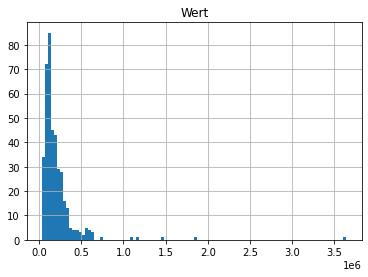

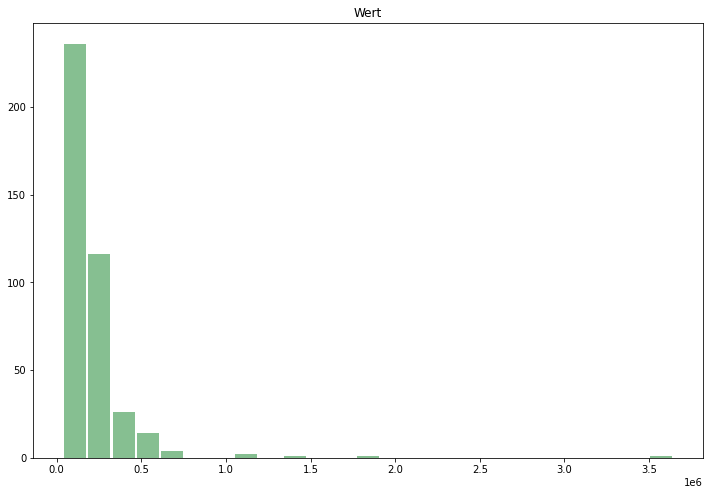

In [195]:
inhabitants3.hist(bins=100)

ax = inhabitants3.hist(column='Wert', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax.ticklabel_format(useOffset=False)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on", useOffset=Fa)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

## Wie verteilt sich die Bevölkerung auf Gemeinden mit welcher Einwohnerzahl?

https://de.statista.com/statistik/daten/studie/1254/umfrage/anzahl-der-gemeinden-in-deutschland-nach-gemeindegroessenklassen/
    
    

In [162]:
# Bevölkerungsstand
inhabitants_districts = get_df('?regions=all&data=12411%3ABEVSTD&time=2018&level=4&labels=name')
# inhabitants = inhabitants.reset_index()
# inhabitants[inhabitants.Region.str.contains('Köln')]

https://tabular.genesapi.org/?regions=all&data=12411%3ABEVSTD&time=2018&level=4&labels=name


In [163]:
# TODO Make histogram
# inhabitants.plot(typ='hist')

Warum hat dieser Datensatz 11.030 Spalten, wenn es laut 11111 11.014 Gemeinden gibt?

In [164]:
len(inhabitants)

16

In [165]:
combined = inhabitants.merge(count_districts, on='Region')
combined = combined.reset_index()
combined

,level_0,index,Region,Jahr_x,Merkmal_x,Wert_x,Statistik_x,Jahr_y,Merkmal_y,Wert_y,Statistik_y
0,0,9,Nordrhein-Westfalen,2018,Bevölkerungsstand,17932651,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,396,Feststellung des Gebietsstandes
1,1,1,Bayern,2018,Bevölkerungsstand,13076721,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,2056,Feststellung des Gebietsstandes
2,2,0,"Baden-Württemberg, Land",2018,Bevölkerungsstand,11069533,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,1101,Feststellung des Gebietsstandes
3,3,8,Niedersachsen,2018,Bevölkerungsstand,7982448,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,945,Feststellung des Gebietsstandes
4,4,6,Hessen,2018,Bevölkerungsstand,6265809,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,426,Feststellung des Gebietsstandes
5,5,10,Rheinland-Pfalz,2018,Bevölkerungsstand,4084844,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,2305,Feststellung des Gebietsstandes
6,6,12,Sachsen,2018,Bevölkerungsstand,4077937,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,422,Feststellung des Gebietsstandes
7,7,2,Berlin,2018,Bevölkerungsstand,3644826,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,12,Feststellung des Gebietsstandes
8,8,14,Schleswig-Holstein,2018,Bevölkerungsstand,2896712,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,1110,Feststellung des Gebietsstandes
9,9,3,Brandenburg,2018,Bevölkerungsstand,2511917,Fortschreibung des Bevölkerungsstandes,2017,Zahl der Gemeinden,417,Feststellung des Gebietsstandes


In [166]:
# Density
get_df('?regions=all&data=99910%3AAI0201&time=2017&labels=name')

https://tabular.genesapi.org/?regions=all&data=99910%3AAI0201&time=2017&labels=name


,Region,Jahr,Merkmal,Wert,Statistik
0,"Baden-Württemberg, Land",2017,Bevölkerungsdichte (Einwohner je qkm),309.0,Regionalatlas Deutschland
1,Bayern,2017,Bevölkerungsdichte (Einwohner je qkm),184.2,Regionalatlas Deutschland
2,Berlin,2017,Bevölkerungsdichte (Einwohner je qkm),4055.0,Regionalatlas Deutschland
3,Brandenburg,2017,Bevölkerungsdichte (Einwohner je qkm),84.4,Regionalatlas Deutschland
4,Bremen,2017,Bevölkerungsdichte (Einwohner je qkm),1622.1,Regionalatlas Deutschland
5,Hamburg,2017,Bevölkerungsdichte (Einwohner je qkm),2424.3,Regionalatlas Deutschland
6,Hessen,2017,Bevölkerungsdichte (Einwohner je qkm),295.7,Regionalatlas Deutschland
7,Mecklenburg-Vorpommern,2017,Bevölkerungsdichte (Einwohner je qkm),69.2,Regionalatlas Deutschland
8,Niedersachsen,2017,Bevölkerungsdichte (Einwohner je qkm),166.9,Regionalatlas Deutschland
9,Nordrhein-Westfalen,2017,Bevölkerungsdichte (Einwohner je qkm),525.1,Regionalatlas Deutschland


In [167]:
# Area
get_df('?regions=all&data=11111%3AFLC006&time=2018&labels=name')

https://tabular.genesapi.org/?regions=all&data=11111%3AFLC006&time=2018&labels=name


,Region,Jahr,Merkmal,Wert,Statistik
0,"Baden-Württemberg, Land",2018,Gebietsfläche,35673.65,Feststellung des Gebietsstandes
1,Bayern,2018,Gebietsfläche,70541.57,Feststellung des Gebietsstandes
2,Berlin,2018,Gebietsfläche,891.12,Feststellung des Gebietsstandes
3,Brandenburg,2018,Gebietsfläche,29654.43,Feststellung des Gebietsstandes
4,Bremen,2018,Gebietsfläche,419.84,Feststellung des Gebietsstandes
5,Hamburg,2018,Gebietsfläche,755.09,Feststellung des Gebietsstandes
6,Hessen,2018,Gebietsfläche,21115.66,Feststellung des Gebietsstandes
7,Mecklenburg-Vorpommern,2018,Gebietsfläche,23293.62,Feststellung des Gebietsstandes
8,Niedersachsen,2018,Gebietsfläche,47709.50,Feststellung des Gebietsstandes
9,Nordrhein-Westfalen,2018,Gebietsfläche,34112.31,Feststellung des Gebietsstandes


In [ ]:
# Durchschnittsalter der Bevölkerung



In [67]:
# Brandenburg
get_df('?regions=all&nuts=3&data=12411%3ABEVSTD&time=2018')

https://tabular.genesapi.org/?regions=all&nuts=3&data=12411%3ABEVSTD&time=2018


,year,measure,value,statistic
region_id,,,,
01,2018,BEVSTD,2896712,12411
02,2018,BEVSTD,1841179,12411
03,2018,BEVSTD,7982448,12411
04,2018,BEVSTD,682986,12411
05,2018,BEVSTD,17932651,12411
06,2018,BEVSTD,6265809,12411
07,2018,BEVSTD,4084844,12411
08,2018,BEVSTD,11069533,12411
09,2018,BEVSTD,13076721,12411


Um 

- Liste mit Länder range(01,16) 
for i in range(
get_df('?regions=all&data=12411%3ABEVSTD&time=2018&nuts=1&labels=name')

In [43]:
get_df('?region=05&data=11111%3AGEM001&nuts=1&time=2017&labels=name')

https://tabular.genesapi.org/?region=05&data=11111%3AGEM001&nuts=1&time=2017&labels=name


,Jahr,Merkmal,Wert,Statistik
Region,,,,
Nordrhein-Westfalen,2017,Zahl der Gemeinden,396,Feststellung des Gebietsstandes


In [2]:
get_df('?data=11111:FLC006&level=1&layout=region&year=2017')

https://tabular.genesapi.org/?data=11111:FLC006&level=1&layout=region&year=2017


,F.L.C.0.0.6-year:1995,F.L.C.0.0.6-year:1996,F.L.C.0.0.6-year:1997,F.L.C.0.0.6-year:1998,F.L.C.0.0.6-year:1999,F.L.C.0.0.6-year:2000,F.L.C.0.0.6-year:2001,F.L.C.0.0.6-year:2002,F.L.C.0.0.6-year:2003,F.L.C.0.0.6-year:2004,...,F.L.C.0.0.6-year:2008,F.L.C.0.0.6-year:2009,F.L.C.0.0.6-year:2010,F.L.C.0.0.6-year:2011,F.L.C.0.0.6-year:2012,F.L.C.0.0.6-year:2013,F.L.C.0.0.6-year:2014,F.L.C.0.0.6-year:2015,F.L.C.0.0.6-year:2016,F.L.C.0.0.6-year:2017
region_id,,,,,,,,,,,,,,,,,,,,,
01,15770.27,15770.28,15770.32,15768.70,15764.42,15763.08,15761.40,15762.89,15763.18,15763.42,...,15799.19,15799.07,15799.32,15799.56,15799.64,15799.65,15802.50,15802.51,15802.27,15804.20
02,755.33,755.33,755.33,755.33,755.33,755.33,755.33,755.33,755.33,755.24,...,755.30,755.30,755.30,755.33,755.33,755.22,755.22,755.22,755.09,755.09
03,47610.55,47612.24,47613.35,47613.51,47614.27,47615.70,47616.48,47617.97,47618.24,47619.63,...,47626.60,47634.90,47612.78,47613.52,47613.78,47614.07,47614.82,47615.85,47709.83,47709.82
04,404.23,404.23,404.23,404.23,404.23,404.23,404.23,404.23,404.23,404.23,...,404.28,404.28,419.29,419.37,419.38,419.38,419.38,419.84,419.84,419.84
05,34077.64,34078.72,34079.92,34080.02,34080.58,34081.36,34081.88,34082.81,34083.38,34084.13,...,34088.31,34088.01,34092.26,34097.72,34109.70,34110.26,34110.40,34112.52,34112.74,34112.45
06,21114.65,21114.75,21115.05,21114.59,21114.38,21114.32,21114.96,21114.96,21114.83,21114.94,...,21114.89,21114.91,21114.76,21114.93,21114.92,21114.93,21114.90,21114.99,21115.67,21115.68
07,19851.85,19852.60,19853.04,19853.01,19853.24,19853.08,19852.81,19852.92,19853.60,19853.37,...,19853.60,19853.58,19854.06,19854.13,19854.10,19854.21,19854.36,19854.46,19858.00,19858.00
08,35742.52,35741.87,35741.97,35741.79,35741.42,35741.36,35741.65,35741.67,35741.70,35741.77,...,35741.49,35741.51,35741.53,35676.84,35676.79,35676.74,35676.77,35676.76,35673.71,35673.73
09,70550.73,70551.56,70548.04,70548.00,70547.82,70547.82,70550.04,70549.44,70549.21,70549.44,...,70551.49,70550.11,70550.23,70550.32,70550.24,70550.15,70550.11,70550.07,70542.03,70542.03


In [49]:
# Get all nuts-3 regions in germany
all_nuts3 = get_df('?data=11111:FLC006&level=3&layout=region')

https://tabular.genesapi.org/?data=11111:FLC006&level=3&layout=region


In [52]:
all_nuts3.head()

,11111.FLC006-year:1995,11111.FLC006-year:1996,11111.FLC006-year:1997,11111.FLC006-year:1998,11111.FLC006-year:1999,11111.FLC006-year:2000,11111.FLC006-year:2001,11111.FLC006-year:2002,11111.FLC006-year:2003,11111.FLC006-year:2004,...,11111.FLC006-year:2008,11111.FLC006-year:2009,11111.FLC006-year:2010,11111.FLC006-year:2011,11111.FLC006-year:2012,11111.FLC006-year:2013,11111.FLC006-year:2014,11111.FLC006-year:2015,11111.FLC006-year:2016,11111.FLC006-year:2017
region_id,,,,,,,,,,,,,,,,,,,,,
01001,56.44,56.44,56.44,56.44,56.44,56.46,56.46,56.38,56.37,56.38,...,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.73
01002,116.82,116.82,117.3,118.39,118.39,118.39,118.39,118.39,118.39,118.4,...,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65
01003,214.16,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.13,...,214.2,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.19
01004,71.56,71.56,71.56,71.56,71.56,71.57,71.57,71.63,71.63,71.63,...,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.66
01051,1436.49,1436.35,1436.35,1433.68,1429.22,1429.37,1428.63,1428.64,1428.18,1428.21,...,1428.04,1428.01,1427.84,1428.09,1428.08,1428.09,1428.12,1428.13,1428.14,1428.17


In [53]:
nuts3 = all_nuts3[['11111.FLC006-year:2017']]

In [63]:
len(nuts3)

474

In [37]:
get_df('?data=11111:FLC006&level=3&layout=region&year=2017&layout=time')

https://tabular.genesapi.org/?data=11111:FLC006&level=3&layout=region&year=2017&layout=time


""
"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2 Final//EN"">"
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>


### generelle Angaben:

#### Layout
- `layout=time` - Eine Zeile pro Jahr/Datum
- `layout=region` - Eine Zeile pro Region
- `layout=long` - Eine Zeile pro Wert (**default**)

#### Beschriftungen
- `labels=id` (**default**) - Nur Kürzel/ids
- `labels=name` - ausgeschriebene Namen
- `labels=both` - beschriftung id + name

#### Format
- `format=csv` (**default**)
- `format=tsv` - Tabulator-getrennt
- `format=json` - json, 1 objekt pro Tabellenzeile + Tabellen-Metadaten (Beispiel siehe unten)
- `delimiter=,` (**default**) stattdessen ginge auch `delimiter=;`

#### Datumsformat
- `dformat=year` - Datumsformat: Jahre (**default**) 
- `dformat=date` - Datumsformat: Tage


## Beispiel: Einfache Tabelle mit 1 Messwert

`?data=11111:FLC006` 

Messwert: `FLC006` (Fläche)

Statistik: `11111` (Feststellung des Gebietstandes)



In [5]:
get_df('?data=11111:FLC006&level=3&layout=region')

https://tabular.genesapi.org/?data=11111:FLC006&level=3&layout=region


,11111.FLC006-year:1995,11111.FLC006-year:1996,11111.FLC006-year:1997,11111.FLC006-year:1998,11111.FLC006-year:1999,11111.FLC006-year:2000,11111.FLC006-year:2001,11111.FLC006-year:2002,11111.FLC006-year:2003,11111.FLC006-year:2004,...,11111.FLC006-year:2008,11111.FLC006-year:2009,11111.FLC006-year:2010,11111.FLC006-year:2011,11111.FLC006-year:2012,11111.FLC006-year:2013,11111.FLC006-year:2014,11111.FLC006-year:2015,11111.FLC006-year:2016,11111.FLC006-year:2017
region_id,,,,,,,,,,,,,,,,,,,,,
01001,56.44,56.44,56.44,56.44,56.44,56.46,56.46,56.38,56.37,56.38,...,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.73
01002,116.82,116.82,117.3,118.39,118.39,118.39,118.39,118.39,118.39,118.4,...,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65
01003,214.16,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.13,...,214.2,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.19
01004,71.56,71.56,71.56,71.56,71.56,71.57,71.57,71.63,71.63,71.63,...,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.66
01051,1436.49,1436.35,1436.35,1433.68,1429.22,1429.37,1428.63,1428.64,1428.18,1428.21,...,1428.04,1428.01,1427.84,1428.09,1428.08,1428.09,1428.12,1428.13,1428.14,1428.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,1041.64,1041.64,1034.56,1034.56,1034.55,1034.55,1034.56,1034.57,1034.57,1034.58,...,1034.59,1034.59,1034.58,1034.58,1034.58,1034.63,1036.03,1036.03,1036.03,1036.03
16074,817,817.01,817.04,817.03,817.02,817.01,817,816.99,816.99,816.99,...,816.98,816.98,816.97,816.97,816.97,816.97,815.23,815.25,815.24,815.24
16075,1148.26,1148.25,1148.25,1148.25,1148.27,1148.27,1148.25,1148.41,1148.41,1148.41,...,1148.48,1148.52,1148.47,1148.47,1148.39,1148.39,1151.3,1151.3,1151.3,1151.3


## Regionen

Filter nach Level und/oder nach Eltern-Region

Parameter:

`level`

- 0 - Deutschland gesamt
- 1 - Bundesländer
- 2 - Regierungsbezirke / stat. Regionen
- 3 - Bundesländer
- 4 - Gemeinden

`parent`

Id der Eltern-Region. Technisch ist das lediglich ein Prefix-Filter, es wäre also z.B. auch `parent=123` erlaubt (auch wenn es keine Region mit der id 123 gibt), um alle Regionen, deren Id mit `123` beginnt, abzufragen.

**default**: `level=1&region=all` (alle Bundesländer)

### alle landkreise in brandenburg

In [23]:
get_df('?data=11111:FLC006&level=3&layout=region&year=2017')

https://tabular.genesapi.org/?data=11111:FLC006&level=3&layout=region&year=2017


,11111.FLC006-year:1995,11111.FLC006-year:1996,11111.FLC006-year:1997,11111.FLC006-year:1998,11111.FLC006-year:1999,11111.FLC006-year:2000,11111.FLC006-year:2001,11111.FLC006-year:2002,11111.FLC006-year:2003,11111.FLC006-year:2004,...,11111.FLC006-year:2008,11111.FLC006-year:2009,11111.FLC006-year:2010,11111.FLC006-year:2011,11111.FLC006-year:2012,11111.FLC006-year:2013,11111.FLC006-year:2014,11111.FLC006-year:2015,11111.FLC006-year:2016,11111.FLC006-year:2017
region_id,,,,,,,,,,,,,,,,,,,,,
01001,56.44,56.44,56.44,56.44,56.44,56.46,56.46,56.38,56.37,56.38,...,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.73
01002,116.82,116.82,117.3,118.39,118.39,118.39,118.39,118.39,118.39,118.4,...,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65
01003,214.16,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.13,...,214.2,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.19
01004,71.56,71.56,71.56,71.56,71.56,71.57,71.57,71.63,71.63,71.63,...,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.66
01051,1436.49,1436.35,1436.35,1433.68,1429.22,1429.37,1428.63,1428.64,1428.18,1428.21,...,1428.04,1428.01,1427.84,1428.09,1428.08,1428.09,1428.12,1428.13,1428.14,1428.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,1041.64,1041.64,1034.56,1034.56,1034.55,1034.55,1034.56,1034.57,1034.57,1034.58,...,1034.59,1034.59,1034.58,1034.58,1034.58,1034.63,1036.03,1036.03,1036.03,1036.03
16074,817,817.01,817.04,817.03,817.02,817.01,817,816.99,816.99,816.99,...,816.98,816.98,816.97,816.97,816.97,816.97,815.23,815.25,815.24,815.24
16075,1148.26,1148.25,1148.25,1148.25,1148.27,1148.27,1148.25,1148.41,1148.41,1148.41,...,1148.48,1148.52,1148.47,1148.47,1148.39,1148.39,1151.3,1151.3,1151.3,1151.3


### Mehrere Regionen

kann man mit Komma getrennt angeben: `region=10,12,13`

In [38]:
get_df('?data=11111:FLC006&region=10,12,13&layout=time')

https://tabular.genesapi.org/?data=11111:FLC006&region=10,12,13&layout=time


,11111.FLC006-region_id:10,11111.FLC006-region_id:12,11111.FLC006-region_id:13
year,,,
1995,2570.15,29478.67,23170.29
1996,2570.15,29475.81,23170.12
1997,2570.10,29476.01,23170.17
1998,2570.19,29476.45,23170.94
1999,2570.14,29476.75,23171.41
2000,2568.51,29477.09,23172.48
2001,2568.48,29476.10,23172.89
2002,2568.51,29476.61,23173.43
2003,2568.65,29477.14,23174.10


### Alle Kreise

`level=3`

In [5]:
get_df('?data=11111:FLC006&level=3&layout=region')

https://tabular.genesapi.org/?data=11111:FLC006&level=3&layout=region


,11111.FLC006-year:1995,11111.FLC006-year:1996,11111.FLC006-year:1997,11111.FLC006-year:1998,11111.FLC006-year:1999,11111.FLC006-year:2000,11111.FLC006-year:2001,11111.FLC006-year:2002,11111.FLC006-year:2003,11111.FLC006-year:2004,...,11111.FLC006-year:2008,11111.FLC006-year:2009,11111.FLC006-year:2010,11111.FLC006-year:2011,11111.FLC006-year:2012,11111.FLC006-year:2013,11111.FLC006-year:2014,11111.FLC006-year:2015,11111.FLC006-year:2016,11111.FLC006-year:2017
region_id,,,,,,,,,,,,,,,,,,,,,
01001,56.44,56.44,56.44,56.44,56.44,56.46,56.46,56.38,56.37,56.38,...,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.74,56.73
01002,116.82,116.82,117.3,118.39,118.39,118.39,118.39,118.39,118.39,118.4,...,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65,118.65
01003,214.16,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.14,214.13,...,214.2,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.21,214.19
01004,71.56,71.56,71.56,71.56,71.56,71.57,71.57,71.63,71.63,71.63,...,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.63,71.66
01051,1436.49,1436.35,1436.35,1433.68,1429.22,1429.37,1428.63,1428.64,1428.18,1428.21,...,1428.04,1428.01,1427.84,1428.09,1428.08,1428.09,1428.12,1428.13,1428.14,1428.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,1041.64,1041.64,1034.56,1034.56,1034.55,1034.55,1034.56,1034.57,1034.57,1034.58,...,1034.59,1034.59,1034.58,1034.58,1034.58,1034.63,1036.03,1036.03,1036.03,1036.03
16074,817,817.01,817.04,817.03,817.02,817.01,817,816.99,816.99,816.99,...,816.98,816.98,816.97,816.97,816.97,816.97,815.23,815.25,815.24,815.24
16075,1148.26,1148.25,1148.25,1148.25,1148.27,1148.27,1148.25,1148.41,1148.41,1148.41,...,1148.48,1148.52,1148.47,1148.47,1148.39,1148.39,1151.3,1151.3,1151.3,1151.3


## Zeitraum

wird mit dem Parameter `?time` in Jahren angegeben. 

- `?time=2018` - Daten für 2018
- `?time=2010:2018` - Daten von 2010 bis 2018
- `?time=2015:` - Daten seit 2015
- `?time=:2016` - Daten bis einschließlich 2016
- `?time=2002,2012` - Daten für 2002 und 2012
- `?time=last` - Daten des aktuellsten vorhandenen Jahres

**default**: `?time=all` - alle verfügbaren Daten

### Bevölkerungsentwicklung in den Bundesländern seit 2015

Messwert: `BEVSTD` Bevölkerungsstand

Statistik: `12411` Fortschreibung des Bevölkerungsstandes

In [6]:
get_df('?data=12411:BEVSTD&time=2015:&level=1&layout=region&sort=region')

https://tabular.genesapi.org/?data=12411:BEVSTD&time=2015:&level=1&layout=region&sort=region


,12411.BEVSTD-year:2015,12411.BEVSTD-year:2016,12411.BEVSTD-year:2017
region_id,,,
01,2858714,2881926,2889821
02,1787408,1810438,1830584
03,7926599,7945685,7962775
04,671489,678753,681032
05,17865516,17890100,17912134
06,6176172,6213088,6243262
07,4052803,4066053,4073679
08,10879618,10951893,11023425
09,12843514,12930751,12997204


In [7]:
get_df('?data=12411:BEVSTD&time=2015:&level=1&layout=time&sort=region')

https://tabular.genesapi.org/?data=12411:BEVSTD&time=2015:&level=1&layout=time&sort=region


,12411.BEVSTD-region_id:01,12411.BEVSTD-region_id:02,12411.BEVSTD-region_id:03,12411.BEVSTD-region_id:04,12411.BEVSTD-region_id:05,12411.BEVSTD-region_id:06,12411.BEVSTD-region_id:07,12411.BEVSTD-region_id:08,12411.BEVSTD-region_id:09,12411.BEVSTD-region_id:10,12411.BEVSTD-region_id:11,12411.BEVSTD-region_id:12,12411.BEVSTD-region_id:13,12411.BEVSTD-region_id:14,12411.BEVSTD-region_id:15,12411.BEVSTD-region_id:16
year,,,,,,,,,,,,,,,,
2015,2858714,1787408,7926599,671489,17865516,6176172,4052803,10879618,12843514,995597,3520031,2484826,1612362,4084851,2245470,2170714
2016,2881926,1810438,7945685,678753,17890100,6213088,4066053,10951893,12930751,996651,3574830,2494648,1610674,4081783,2236252,2158128
2017,2889821,1830584,7962775,681032,17912134,6243262,4073679,11023425,12997204,994187,3613495,2504040,1611119,4081308,2223081,2151205


In [8]:
get_df('?data=82111:BWS005(WZ08SE:INSGESAMT)&layout=region&level=1')

https://tabular.genesapi.org/?data=82111:BWS005(WZ08SE:INSGESAMT)&layout=region&level=1


,82111:BWS005(WZ08SE:INSGESAMT)-year:2000,82111:BWS005(WZ08SE:INSGESAMT)-year:2001,82111:BWS005(WZ08SE:INSGESAMT)-year:2002,82111:BWS005(WZ08SE:INSGESAMT)-year:2003,82111:BWS005(WZ08SE:INSGESAMT)-year:2004,82111:BWS005(WZ08SE:INSGESAMT)-year:2005,82111:BWS005(WZ08SE:INSGESAMT)-year:2006,82111:BWS005(WZ08SE:INSGESAMT)-year:2007,82111:BWS005(WZ08SE:INSGESAMT)-year:2008,82111:BWS005(WZ08SE:INSGESAMT)-year:2009,82111:BWS005(WZ08SE:INSGESAMT)-year:2010,82111:BWS005(WZ08SE:INSGESAMT)-year:2011,82111:BWS005(WZ08SE:INSGESAMT)-year:2012,82111:BWS005(WZ08SE:INSGESAMT)-year:2013,82111:BWS005(WZ08SE:INSGESAMT)-year:2014,82111:BWS005(WZ08SE:INSGESAMT)-year:2015,82111:BWS005(WZ08SE:INSGESAMT)-year:2016,82111:BWS005(WZ08SE:INSGESAMT)-year:2017
region_id,,,,,,,,,,,,,,,,,,
01,57867711,59730677,59105197,59720320,61232386,61571703,63431130,64769829,66900701,64811186,66497746,68802878,71742315,73304370,75863090,77672903,80506109,84308699
02,70476803,74535730,75904015,76075699,77979701,79581906,80667541,83128185,85596843,82282148,85106990,86117098,88078677,91974547,94428250,99355219,100646471,104922865
03,165837608,169030937,168138738,168618828,173568758,177177259,184963450,192029494,197223362,188247030,200535047,211884632,217025842,220930173,230693056,233437561,251416501,259440533
04,20171028,20925623,21547092,22071524,22377827,22720439,23778060,24551120,24877446,22573986,24043170,24849649,25944106,26239991,27079007,28002924,28628470,29781068
05,422977217,433473260,441558076,441069407,454619688,460190184,475323483,502080925,514948864,493770811,509476655,528876222,535869455,547736312,567736091,584377367,598594793,617732568
06,175465934,182203538,183366218,187786800,190904987,192072906,198041964,204667618,207430702,196920392,204421988,211606627,213887156,219363497,228404713,235634543,246121318,253276577
07,84908552,85391550,87356112,87700908,90769496,91218971,94655671,98480214,100166628,97214197,102888370,107438003,110280641,112693133,117445740,123341835,126228871,129579785
08,279239462,292356708,294708407,296909044,301488933,304294942,322908465,339332049,343202888,318932743,346368099,364649271,371744584,381693337,396820642,417545540,428828255,446402692
09,323612720,336653673,345208243,341686338,353981142,359171405,373518905,390112161,393086089,382818910,405119912,431584041,443925768,458002317,477684544,498543510,521208920,545791450


In [9]:
get_df('?data=82111:BWS005(WZ08SE:INSGESAMT)&layout=region&level=3&sort=region')

https://tabular.genesapi.org/?data=82111:BWS005(WZ08SE:INSGESAMT)&layout=region&level=3&sort=region


,82111:BWS005(WZ08SE:INSGESAMT)-year:2000,82111:BWS005(WZ08SE:INSGESAMT)-year:2001,82111:BWS005(WZ08SE:INSGESAMT)-year:2002,82111:BWS005(WZ08SE:INSGESAMT)-year:2003,82111:BWS005(WZ08SE:INSGESAMT)-year:2004,82111:BWS005(WZ08SE:INSGESAMT)-year:2005,82111:BWS005(WZ08SE:INSGESAMT)-year:2006,82111:BWS005(WZ08SE:INSGESAMT)-year:2007,82111:BWS005(WZ08SE:INSGESAMT)-year:2008,82111:BWS005(WZ08SE:INSGESAMT)-year:2009,82111:BWS005(WZ08SE:INSGESAMT)-year:2010,82111:BWS005(WZ08SE:INSGESAMT)-year:2011,82111:BWS005(WZ08SE:INSGESAMT)-year:2012,82111:BWS005(WZ08SE:INSGESAMT)-year:2013,82111:BWS005(WZ08SE:INSGESAMT)-year:2014,82111:BWS005(WZ08SE:INSGESAMT)-year:2015,82111:BWS005(WZ08SE:INSGESAMT)-year:2016,82111:BWS005(WZ08SE:INSGESAMT)-year:2017
region_id,,,,,,,,,,,,,,,,,,
01001,2.3624e+06,2.38971e+06,2.45369e+06,2.47132e+06,2.65229e+06,2.72732e+06,2.8358e+06,2.85958e+06,2.92505e+06,2.80591e+06,2.82095e+06,2.85644e+06,2.92296e+06,2.96437e+06,2994967,3186463,3247885,3.39073e+06
01002,7.06259e+06,7.22814e+06,6.92079e+06,7.27842e+06,7.27678e+06,7.38827e+06,7.72471e+06,7.7088e+06,8.15248e+06,8.15423e+06,8.19835e+06,8.46326e+06,8.60717e+06,9.08142e+06,9525522,9671340,10027107,1.04997e+07
01003,5.09467e+06,5.20068e+06,5.33479e+06,5.46005e+06,5.29445e+06,5.28194e+06,5.56823e+06,5.71393e+06,5.72684e+06,5.54555e+06,5.78734e+06,6.06616e+06,6.47987e+06,6.65435e+06,7173214,7317161,7482928,7.91486e+06
01004,1.98176e+06,1.96306e+06,1.98937e+06,2.09151e+06,1.99857e+06,2.02471e+06,2.11375e+06,2.18951e+06,2.20711e+06,2.1433e+06,2.25575e+06,2.37676e+06,2.39768e+06,2.48916e+06,2643875,2708934,2758514,2.90362e+06
01051,2.77557e+06,2.90355e+06,2.87142e+06,2.79668e+06,3.85667e+06,2.71936e+06,2.94984e+06,2.78719e+06,3.05429e+06,2.8432e+06,2.99475e+06,3.06156e+06,3.23587e+06,3.39782e+06,3333046,3560495,3702119,3.95222e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,1.72513e+06,1.66701e+06,1.73772e+06,1.7369e+06,1.86426e+06,1.85921e+06,2.00226e+06,2.19350e+06,2.26444e+06,2.02889e+06,2.07061e+06,2.20948e+06,2.23868e+06,2.31941e+06,2464855,2507244,2544848,2.60686e+06
16074,1.13541e+06,1.19393e+06,1.19653e+06,1.23237e+06,1.25396e+06,1.27281e+06,1.33319e+06,1.41388e+06,1.4258e+06,1.38364e+06,1.44869e+06,1.54886e+06,1.58015e+06,1.62086e+06,1720651,1708134,1701294,1.73728e+06
16075,1.35566e+06,1.39427e+06,1.52066e+06,1.489e+06,1.49871e+06,1.45548e+06,1.51642e+06,1.60312e+06,1.6199e+06,1.5602e+06,1.73264e+06,1.76642e+06,1.87784e+06,1.9613e+06,2077769,2038183,2081485,2.09499e+06


In [10]:
get_df('?data=82111:BWS005(WZ08SE)&level=3&sort=region')

https://tabular.genesapi.org/?data=82111:BWS005(WZ08SE)&level=3&sort=region


,year,measure,value,82111:BWS005(WZ08SE),statistic
region_id,,,,,
01001,2000,BWS005,2362395,INSGESAMT,82111
01001,2000,BWS005,592,WZ08_A,82111
01001,2000,BWS005,490146,WZ08_B_18,82111
01001,2000,BWS005,426952,WZ08_C,82111
01001,2000,BWS005,61548,WZ08_F,82111
...,...,...,...,...,...
16077,2017,BWS005,421808,WZ08_C,82111
16077,2017,BWS005,176270,WZ08_F,82111
16077,2017,BWS005,290990,WZ08_G_01_I_J,82111


## Mehrere Werte

Mehrere Werte, entweder aus der gleichen Statistik oder aus verschiedenen, können gemeinsam abgefragt werden.
Dazu einfach einen weiteren `&data=...` - parameter anhängen:

### Landtagswahlen Sachsen: Wahlberechtigte, Gültige Stimmen, Wahlbeteiligung

Statistik: `14344`

Merkmale: 
- `WAHL01` - Wahlberechtigte
- `WAHL04` - Gültige Stimmen
- `WAHLSR` - Wahlbeteiligung

In [11]:
get_df('?data=14344:WAHL01&data=14344:WAHL04&data=14344:WAHLSR&dformat=date')

https://tabular.genesapi.org/?data=14344:WAHL01&data=14344:WAHL04&data=14344:WAHLSR&dformat=date


,date,measure,value,statistic
region_id,,,,
14,1994-09-11,WAHL01,3586160.0,14344
14,1994-09-11,WAHL04,2063782.0,14344
14,1994-09-11,WAHLSR,58.4,14344
14,1999-09-19,WAHL01,3592456.0,14344
14,1999-09-19,WAHL04,2164072.0,14344
14,1999-09-19,WAHLSR,61.1,14344
14,2004-09-19,WAHL01,3554542.0,14344
14,2004-09-19,WAHL04,2080135.0,14344
14,2004-09-19,WAHLSR,59.6,14344


### Aufgeschlüsselt nach Parteien:

In [12]:
get_df('?data=14344:WAHL01&data=14344:WAHL04(PART03)&data=14344:WAHLSR&sort=time&dformat=date')

https://tabular.genesapi.org/?data=14344:WAHL01&data=14344:WAHL04(PART03)&data=14344:WAHLSR&sort=time&dformat=date


,date,measure,value,14344:WAHL04(PART03),statistic
region_id,,,,,
14,1994-09-11,WAHL01,3586160.0,,14344
14,1994-09-11,WAHL04,85485.0,B90_GRUENE,14344
14,1994-09-11,WAHL04,1199883.0,CDU,14344
14,1994-09-11,WAHL04,36075.0,FDP,14344
14,1994-09-11,WAHL04,339619.0,PDS,14344
14,1994-09-11,WAHL04,60014.0,SONSTIGE,14344
14,1994-09-11,WAHL04,342706.0,SPD,14344
14,1994-09-11,WAHL04,2063782.0,,14344
14,1994-09-11,WAHLSR,58.4,,14344


### Wahlergebnisse in Sachsen und Einbürgerung von Ausländern nach Aufenthaltsdauer und deren Altersgruppen

In [13]:
get_df('?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time')

https://tabular.genesapi.org/?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time


,year,measure,value,12511:BEV008(ALTX04),12511:BEV008(AUFDA1),14344:WAHL04(PART03),statistic
region_id,,,,,,,
14,2009,WAHL04,114963,,,B90_GRUENE,14344
14,2009,WAHL04,722983,,,CDU,14344
14,2009,WAHL04,178867,,,FDP,14344
14,2009,WAHL04,370359,,,PDS,14344
14,2009,WAHL04,222916,,,SONSTIGE,14344
14,2009,WAHL04,187261,,,SPD,14344
14,2011,BEV008,206,ALT000B18,,,12511
14,2011,BEV008,334,ALT018B35,,,12511
14,2011,BEV008,212,ALT035B45,,,12511


In [14]:
get_df('?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&layout=region')

https://tabular.genesapi.org/?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&layout=region


,12511:BEV008(ALTX04:ALT000B18)-year:2011,12511:BEV008(ALTX04:ALT000B18)-year:2014,12511:BEV008(ALTX04:ALT018B35)-year:2011,12511:BEV008(ALTX04:ALT018B35)-year:2014,12511:BEV008(ALTX04:ALT035B45)-year:2011,12511:BEV008(ALTX04:ALT035B45)-year:2014,12511:BEV008(ALTX04:ALT045UM)-year:2011,12511:BEV008(ALTX04:ALT045UM)-year:2014,12511:BEV008(AUFDA1:AUFDA00B08)-year:2011,12511:BEV008(AUFDA1:AUFDA00B08)-year:2014,...,14344:WAHL04(PART03:CDU)-year:2009,14344:WAHL04(PART03:CDU)-year:2014,14344:WAHL04(PART03:FDP)-year:2009,14344:WAHL04(PART03:FDP)-year:2014,14344:WAHL04(PART03:PDS)-year:2009,14344:WAHL04(PART03:PDS)-year:2014,14344:WAHL04(PART03:SONSTIGE)-year:2009,14344:WAHL04(PART03:SONSTIGE)-year:2014,14344:WAHL04(PART03:SPD)-year:2009,14344:WAHL04(PART03:SPD)-year:2014
region_id,,,,,,,,,,,,,,,,,,,,,
14,206,207,334,422,212,284,159,180,129,143,...,722983,645414,178867,61840,370359,309581,222916,164800,187261,202396


In [15]:
get_df('?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&layout=time')

https://tabular.genesapi.org/?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&layout=time


,12511:BEV008(ALTX04:ALT000B18)-region_id:14,12511:BEV008(ALTX04:ALT018B35)-region_id:14,12511:BEV008(ALTX04:ALT035B45)-region_id:14,12511:BEV008(ALTX04:ALT045UM)-region_id:14,12511:BEV008(AUFDA1:AUFDA00B08)-region_id:14,12511:BEV008(AUFDA1:AUFDA08B15)-region_id:14,12511:BEV008(AUFDA1:AUFDA15B20)-region_id:14,12511:BEV008(AUFDA1:AUFDA20UM)-region_id:14,14344:WAHL04(PART03:AFD)-region_id:14,14344:WAHL04(PART03:B90_GRUENE)-region_id:14,14344:WAHL04(PART03:CDU)-region_id:14,14344:WAHL04(PART03:FDP)-region_id:14,14344:WAHL04(PART03:PDS)-region_id:14,14344:WAHL04(PART03:SONSTIGE)-region_id:14,14344:WAHL04(PART03:SPD)-region_id:14
year,,,,,,,,,,,,,,,
2009,,,,,,,,,,114963,722983,178867,370359,222916,187261
2011,206,334,212,159,129,509,182,91,,,,,,,
2014,207,422,284,180,143,644,195,111,159611,93857,645414,61840,309581,164800,202396


## kombinierte Dimensionen

In [16]:
get_df('?data=12613:BEV002(NAT,GES)&time=2017&region=01')

https://tabular.genesapi.org/?data=12613:BEV002(NAT,GES)&time=2017&region=01


,year,measure,value,12613:BEV002(GES),12613:BEV002(NAT),statistic
region_id,,,,,,
01,2017,BEV002,409,GESM,NATA,12613
01,2017,BEV002,16489,GESM,NATD,12613
01,2017,BEV002,16898,GESM,,12613
01,2017,BEV002,290,GESW,NATA,12613
01,2017,BEV002,17267,GESW,NATD,12613
01,2017,BEV002,17557,GESW,,12613
01,2017,BEV002,699,,NATA,12613
01,2017,BEV002,33756,,NATD,12613


In [17]:
get_df('?data=12613:BEV002(NAT,GES)&time=2017&level=3&layout=region')

https://tabular.genesapi.org/?data=12613:BEV002(NAT,GES)&time=2017&level=3&layout=region


,12613:BEV002(GES:GESM)-year:2017,12613:BEV002(GES:GESW)-year:2017,12613:BEV002(NAT:NATA)-year:2017,"12613:BEV002(NAT:NATA,GES:GESM)-year:2017","12613:BEV002(NAT:NATA,GES:GESW)-year:2017",12613:BEV002(NAT:NATD)-year:2017,"12613:BEV002(NAT:NATD,GES:GESM)-year:2017","12613:BEV002(NAT:NATD,GES:GESW)-year:2017"
region_id,,,,,,,,
01001,498,536,33,15,18,1001,483,518
01002,1168,1313,86,51,35,2395,1117,1278
01003,1345,1407,76,51,25,2676,1294,1382
01004,542,599,38,22,16,1103,520,583
01051,870,908,16,9,7,1762,861,901
...,...,...,...,...,...,...,...,...
16073,827,888,3,2,1,1712,825,887
16074,509,496,1,1,,1004,508,496
16075,601,610,4,2,2,1207,599,608


## Labels

Standardmäßig werden Regionen und Merkmale samt ihrer Ausprägungen mit ihren jeweiligen IDs angegeben. Mit `labels=name` werden diese Ids durch ihren ausgeschriebeneen Namen / Bezeichung ersetzt. `labels=both` gibt das Format *Name (id)* zurück.

In [18]:
get_df('?data=12613:BEV002(NAT,GES)&time=2017&region=01&labels=name')

https://tabular.genesapi.org/?data=12613:BEV002(NAT,GES)&time=2017&region=01&labels=name


,Jahr,Merkmal,Wert,Gestorbene: Geschlecht,Gestorbene: Nationalität,Statistik
Region,,,,,,
Schleswig-Holstein,2017,Gestorbene,409,männlich,Ausländer(innen),Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,16489,männlich,Deutsche,Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,16898,männlich,,Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,290,weiblich,Ausländer(innen),Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,17267,weiblich,Deutsche,Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,17557,weiblich,,Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,699,,Ausländer(innen),Statistik der Sterbefälle
Schleswig-Holstein,2017,Gestorbene,33756,,Deutsche,Statistik der Sterbefälle


In [19]:
get_df('?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&labels=name')

https://tabular.genesapi.org/?region=14&data=14344:WAHL04(PART03)&data=12511:BEV008(AUFDA1,ALTX04)&time=2009,2011,2014&sort=time&labels=name


,Jahr,Merkmal,Wert,"Einbürgerungen von Ausländern: Altersgruppen (unter 18,18-35,35-45, 45 und älter)",Einbürgerungen von Ausländern: Aufenthaltsdauer,Gültige Stimmen: Parteien,Statistik
Region,,,,,,,
Sachsen,2009,Gültige Stimmen,722983,,,CDU/CSU,Landtagswahlen: Sachsen
Sachsen,2009,Gültige Stimmen,370359,,,DIE LINKE,Landtagswahlen: Sachsen
Sachsen,2009,Gültige Stimmen,178867,,,FDP,Landtagswahlen: Sachsen
Sachsen,2009,Gültige Stimmen,114963,,,GRÜNE,Landtagswahlen: Sachsen
Sachsen,2009,Gültige Stimmen,187261,,,SPD,Landtagswahlen: Sachsen
Sachsen,2009,Gültige Stimmen,222916,,,Sonstige Parteien,Landtagswahlen: Sachsen
Sachsen,2011,Einbürgerungen von Ausländern,334,18 bis unter 35 Jahre,,,Einbürgerungsstatistik
Sachsen,2011,Einbürgerungen von Ausländern,212,35 bis unter 45 Jahre,,,Einbürgerungsstatistik
Sachsen,2011,Einbürgerungen von Ausländern,159,45 Jahre und mehr,,,Einbürgerungsstatistik


In [20]:
get_df('?data=12613:BEV002(NAT,GES)&time=2017&level=1&layout=region&labels=name')

https://tabular.genesapi.org/?data=12613:BEV002(NAT,GES)&time=2017&level=1&layout=region&labels=name


,"Gestorbene: Ausländer(innen), 2017","Gestorbene: Ausländer(innen), männlich, 2017","Gestorbene: Ausländer(innen), weiblich, 2017","Gestorbene: Deutsche, 2017","Gestorbene: Deutsche, männlich, 2017","Gestorbene: Deutsche, weiblich, 2017","Gestorbene: männlich, 2017","Gestorbene: weiblich, 2017"
Region,,,,,,,,
1,699,409,290,33756,16489,17267,16898,17557
2,909,576,333,16731,8121,8610,8697,8943
3,2433,1420,1013,91280,44538,46742,45958,47755
4,315,191,124,7590,3720,3870,3911,3994
5,8333,5060,3273,196509,94826,101683,99886,104956
6,2918,1773,1145,63419,30860,32559,32633,33704
7,1278,779,499,46107,22421,23686,23200,24185
8,5907,3635,2272,103213,50042,53171,53677,55443
9,4871,2962,1909,129031,62196,66835,65158,68744


In [21]:
get_df('?data=12613:BEV002(NAT,GES)&time=2017&level=1&layout=time&labels=name')

https://tabular.genesapi.org/?data=12613:BEV002(NAT,GES)&time=2017&level=1&layout=time&labels=name


,"Gestorbene: Ausländer(innen), Baden-Württemberg","Gestorbene: Ausländer(innen), Bayern","Gestorbene: Ausländer(innen), Berlin","Gestorbene: Ausländer(innen), Brandenburg","Gestorbene: Ausländer(innen), Bremen","Gestorbene: Ausländer(innen), Hamburg","Gestorbene: Ausländer(innen), Hessen","Gestorbene: Ausländer(innen), Mecklenburg-Vorpommern","Gestorbene: Ausländer(innen), Niedersachsen","Gestorbene: Ausländer(innen), Nordrhein-Westfalen",...,"Gestorbene: weiblich, Hessen","Gestorbene: weiblich, Mecklenburg-Vorpommern","Gestorbene: weiblich, Niedersachsen","Gestorbene: weiblich, Nordrhein-Westfalen","Gestorbene: weiblich, Rheinland-Pfalz","Gestorbene: weiblich, Saarland","Gestorbene: weiblich, Sachsen","Gestorbene: weiblich, Sachsen-Anhalt","Gestorbene: weiblich, Schleswig-Holstein","Gestorbene: weiblich, Thüringen"
Jahr,,,,,,,,,,,,,,,,,,,,,
2017,5907,4871,1593,267,315,909,2918,120,2433,8333,...,33704,10052,47755,104956,24185,6786,27822,16326,17557,15024


In [22]:
get_df('?data=12511:BEV008(AUFDA1:AUFDA00B08|AUFDA15B20)&labels=name&sort=time')

https://tabular.genesapi.org/?data=12511:BEV008(AUFDA1:AUFDA00B08|AUFDA15B20)&labels=name&sort=time


,Jahr,Merkmal,Wert,Einbürgerungen von Ausländern: Aufenthaltsdauer,Statistik
Region,,,,,
Baden-Württemberg,2011,Einbürgerungen von Ausländern,3027,Aufenthaltsdauer 15 bis unter 20 Jahren,Einbürgerungsstatistik
Baden-Württemberg,2011,Einbürgerungen von Ausländern,1628,Aufenthaltsdauer unter 8 Jahren,Einbürgerungsstatistik
Bayern,2011,Einbürgerungen von Ausländern,2003,Aufenthaltsdauer 15 bis unter 20 Jahren,Einbürgerungsstatistik
Bayern,2011,Einbürgerungen von Ausländern,1505,Aufenthaltsdauer unter 8 Jahren,Einbürgerungsstatistik
Berlin,2011,Einbürgerungen von Ausländern,1359,Aufenthaltsdauer 15 bis unter 20 Jahren,Einbürgerungsstatistik
...,...,...,...,...,...
Sachsen-Anhalt,2017,Einbürgerungen von Ausländern,129,Aufenthaltsdauer unter 8 Jahren,Einbürgerungsstatistik
Schleswig-Holstein,2017,Einbürgerungen von Ausländern,468,Aufenthaltsdauer 15 bis unter 20 Jahren,Einbürgerungsstatistik
Schleswig-Holstein,2017,Einbürgerungen von Ausländern,472,Aufenthaltsdauer unter 8 Jahren,Einbürgerungsstatistik


## JSON

`format=json`

Gibt die Daten (key: `data`) als json (response mimetype: `application/json`) zurück samt metadaten (key: `schema`) zur Tabellenstruktur.

In [23]:
import json  # for pretty printing
url = BASE_URL + '?data=11111:FLC006&time=2017&layout=region&format=json'
print(url)
data = requests.get(url)
print(json.dumps(data.json(), indent=2))

https://tabular.genesapi.org?data=11111:FLC006&time=2017&layout=region&format=json
{
  "schema": {
    "fields": [
      {
        "name": "region_id",
        "type": "string"
      },
      {
        "name": "11111.FLC006-year:2017",
        "type": "number"
      }
    ],
    "primaryKey": [
      "region_id"
    ],
    "pandas_version": "0.20.0"
  },
  "data": [
    {
      "region_id": "01",
      "11111.FLC006-year:2017": 15804.2
    },
    {
      "region_id": "02",
      "11111.FLC006-year:2017": 755.09
    },
    {
      "region_id": "03",
      "11111.FLC006-year:2017": 47709.82
    },
    {
      "region_id": "04",
      "11111.FLC006-year:2017": 419.84
    },
    {
      "region_id": "05",
      "11111.FLC006-year:2017": 34112.45
    },
    {
      "region_id": "06",
      "11111.FLC006-year:2017": 21115.68
    },
    {
      "region_id": "07",
      "11111.FLC006-year:2017": 19858.0
    },
    {
      "region_id": "08",
      "11111.FLC006-year:2017": 35673.73
    },
    {